# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
myDirFiles = "/content/drive/MyDrive/Colab Notebooks/Digital Skola/5.Pandas"
os.chdir(myDirFiles)

In [ ]:
!ls

'HomeWork DataFrame Reja.ipynb'    Untitled0.ipynb
'Homework - DataFrame.xlsx'	   Untitled10.ipynb
'Math Fresh Plant.ipynb'	   Untitled7.ipynb
 Question5.png			   Untitled9.ipynb
'Session 13 - Dataframe II.gdoc'


# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Read Data

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Digital Skola/5.Pandas/Homework - DataFrame.xlsx'

In [ ]:
# read excel data on Paid-Transaction sheet, 
dfPaidTrx = pd.read_excel(filepath, header = 1, usecols = "B:U", index_col = None,  sheet_name= 'Paid-Transaction' )
dfPaidTrx.head(1)

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0


In [ ]:
# read excel data on Transaction Fee sheet, 
dfTrxFee = pd.read_excel(filepath, header = 4, usecols = "B:D", index_col = None, sheet_name = "Transaction Fee")
dfTrxFee.head(3)

#check unique
dfTrxFee['Meta Category'].unique()

array(['Home/ Food', 'Gadget/ Komputer', 'Fashion', 'Babies/ Kids',
       'Beauty/ Health', 'Sports/ Hobi/ Otomotif', 'Elektronik',
       'Service/ Mokado', 'Home/ Food ', 'Gadget/ Komputer ', 'Fashion ',
       'Babies/ Kids ', 'Beauty/ Health ', 'Sports/ Hobi/ Otomotif ',
       'Elektronik ', 'Service/ Mokado '], dtype=object)

In [ ]:
dfTrxFee['Meta Category'] = dfTrxFee['Meta Category'].str.strip()
dfTrxFee.head(1)

,Month,Meta Category,Transaction Fee Rate
0,201707,Home/ Food,0.07


In [ ]:
# read seller sheet
dfSeller = pd.read_excel(filepath, header = 1, usecols = "B:C", index_col = None, sheet_name = "Seller")
dfSeller.head(3)

#check unique
dfSeller['Seller'].unique()

array(['Global Phone', 'E-shop', 'twelven com', ..., 'Grosir Pakaian',
       'Blessframe', 'sugumart'], dtype=object)

In [ ]:
# read confirmed trx
dfCTrx = pd.read_excel(filepath, header = 4, usecols = "B:C", index_col = None, sheet_name = "Confirmed-Transaction")
dfCTrx.head(3)

,Order Number,Purchase Confirmation Date
0,201707240088517,20170727
1,201707018889790,20170701
2,201707079264675,20170707


In [ ]:
# read cancelled trx
dfCancellTrx = pd.read_excel(filepath, header = 1, usecols = "B:D", index_col = None, sheet_name = "Cancelled-Transaction")
dfCancellTrx.head(3)

,Order Number,Cancel Stakeholder,Cancel Reason
0,201708070642912,System,No response from seller
1,201708150868462,Seller,Sold out
2,201712092803286,System,No response from seller


## Question 1 In Paid-Transaction sheet, Insert column after Last Name, name the new column as Full Name.

In [ ]:
dfFullname = dfPaidTrx['First Name'] + ' . ' + dfPaidTrx['Last Name']
dfFullname

In [ ]:
dfPaidTrx.insert(4, 'Full Name', dfFullname , allow_duplicates= False)

In [ ]:
dfPaidTrx.head(1)

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0


In [ ]:
#insert into excel
newPidTrx = dfPaidTrx
newPidTrx.head(1)
newPidTrx.to_excel(writer, sheet_name = 'Paid-Transaction', index = False , startrow= 1, startcol=1)
writer.save()

## Question 2 In Paid-Transaction sheet, insert two columns next to Paid Date. Name the first one as Paid Date 2 and the second as Paid Day.

In [ ]:
dfPaidTrx.insert(1, 'Paid Date 2', pd.to_datetime(dfPaidTrx['Paid Date'], format='%Y%m%d' ).dt.strftime('%d-%b-%y'))
dfPaidTrx.insert(2, 'Paid Day', pd.to_datetime(dfPaidTrx['Paid Date'], format='%Y%m%d' ).dt.strftime('%a'))
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.0,0,0.0
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.0,0,0.0
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900.0,0,0.0
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,5600.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201,01-Dec-17,Fri,201712012704898,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000,300000,2300.0,0,0.0
11996,20171203,03-Dec-17,Sun,201712032723513,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000,222500,0.0,0,0.0
11997,20171204,04-Dec-17,Mon,201712042740205,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000,81000,4800.0,0,0.0
11998,20171207,07-Dec-17,Thu,201712072778621,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000,400000,0.0,0,0.0


## Question 3 In Paid-Transaction sheet, Insert column after Seller Discount, name the new column as GMV

In [ ]:
dfPaidTrx.insert(11, 'GMV', dfPaidTrx['Transaction Amount'] - dfPaidTrx['Seller Discount'] + dfPaidTrx['Delivery Fee'])

In [ ]:
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201,01-Dec-17,Fri,201712012704898,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000,300000,33000,2300.0,0,0.0
11996,20171203,03-Dec-17,Sun,201712032723513,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000,222500,57500,0.0,0,0.0
11997,20171204,04-Dec-17,Mon,201712042740205,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000,81000,69000,4800.0,0,0.0
11998,20171207,07-Dec-17,Thu,201712072778621,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000,400000,75000,0.0,0,0.0


## Question 4 in Paid-Transaction sheet, insert column 'Net Revenue'

`Net Revenue = Transaction Fee Amount - Sales Discount - Other Discount`

In [ ]:
# merge column and drop unused column
dfPaidTrx['Month'] = pd.to_datetime(dfPaidTrx['Paid Date 2'], format='%d-%b-%y').dt.strftime('%m')
dfTrxFee['Month'] = pd.to_datetime(dfTrxFee['Month'], format='%Y%m').dt.strftime('%m')
dfPaidTrx = dfPaidTrx.merge(dfTrxFee, on =  ['Month','Meta Category'], how = 'left')
#dfPaidTrx.drop('Month', axis = 1, inplace = True)

# add column Net Revenue
dfPaidTrx['Net Revenue'] = (dfPaidTrx['Transaction Amount'] * dfPaidTrx['Transaction Fee Rate']) - dfPaidTrx['Sales Discount'] - dfPaidTrx['Other Discount']
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,07,0.034,0.0
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0,07,0.010,2878.0
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0,07,0.010,-350.0
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0,07,0.090,1750.0
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0,07,0.030,-3170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201,01-Dec-17,Fri,201712012704898,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000,300000,33000,2300.0,0,0.0,12,0.009,697.0
11996,20171203,03-Dec-17,Sun,201712032723513,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000,222500,57500,0.0,0,0.0,12,0.009,2520.0
11997,20171204,04-Dec-17,Mon,201712042740205,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000,81000,69000,4800.0,0,0.0,12,0.067,5250.0
11998,20171207,07-Dec-17,Thu,201712072778621,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000,400000,75000,0.0,0,0.0,12,0.032,15200.0


## Question 5 


*   On primary axis, show monthly GMV figures using bar chart.
*   On secondary axis, plot monthly %Net Revenue as line chart.

```
%Net Revenue = Net Revenue / GMV
```

In [ ]:
dfPaidTrx['% Net Revenue'] = dfPaidTrx['Net Revenue']  / dfPaidTrx['GMV']

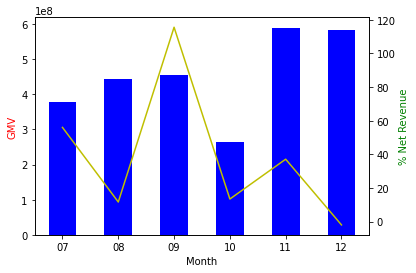

In [ ]:
fig, ax1 = plt.subplots()

ax1 = dfPaidTrx.groupby('Month')['GMV'].sum().plot(kind= 'bar', ylabel ='GMV', color = 'b')
ax2 = dfPaidTrx.groupby('Month')['% Net Revenue'].sum().plot(secondary_y=True, kind= 'line', color = 'y' )

ax1.set_xlabel('Month')
ax1.set_ylabel('GMV', color='r')
ax2.set_ylabel('% Net Revenue', color='g')
plt.savefig('Question5.png')

did we do well in december 2017 ? no, it can bee seen that the number of gmv in desember grew from july. However, % Net revenue fell slightly from july.

In [ ]:
#add to excel
import openpyxl
from openpyxl.drawing.image import Image
writer = pd.ExcelWriter(filepath, mode='a' ,engine='openpyxl', if_sheet_exists ='replace')  
df = pd.DataFrame()
df.to_excel(writer, sheet_name = 'Question5') 
workbook  = writer.book
worksheet = writer.sheets['Question5']
worksheet.add_image(Image('Question5.png'),'A1')
writer.save()

## Question 6
In a new sheet (Name Question6), create a pivot table	

In [ ]:
group1 = ['Home/ Food', 'Sports/ Hobi/ Otomotif' ,'Fashion','Beauty/ Health']
group2 =  ['Gadget/ Komputer', 'Elektronik' ,'Service/ Mokado','Babies/ Kids']
def group_status(category):
  if  category in group1 :
    return '1' 
  else :
    return '2'   

group_status('Home/ Food') 

'1'

In [ ]:
dfPaidTrx['Group'] = dfPaidTrx['Meta Category'].apply(group_status)

In [ ]:
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,% Net Revenue
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,07,0.034,0.0,0.000000
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0,07,0.010,2878.0,0.013094
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0,07,0.010,-350.0,-0.010000
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0,07,0.090,1750.0,0.020588
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0,07,0.030,-3170.0,-0.039136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201,01-Dec-17,Fri,201712012704898,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000,300000,33000,2300.0,0,0.0,12,0.009,697.0,0.021121
11996,20171203,03-Dec-17,Sun,201712032723513,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000,222500,57500,0.0,0,0.0,12,0.009,2520.0,0.043826
11997,20171204,04-Dec-17,Mon,201712042740205,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000,81000,69000,4800.0,0,0.0,12,0.067,5250.0,0.076087
11998,20171207,07-Dec-17,Thu,201712072778621,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000,400000,75000,0.0,0,0.0,12,0.032,15200.0,0.202667


In [ ]:
reach = pd.pivot_table(dfPaidTrx, values=['% Net Revenue'], index=['Group'], columns = 'Month', aggfunc=np.sum)
reach

% Net Revenue                                                        
Month            07         08          09         10         11         12
Group                                                                      
1         71.233961  50.852945  122.115654  43.572529  61.932666  31.889123
2        -15.231668 -39.236441   -6.527630 -30.177823 -24.854851 -33.904947

In [ ]:
df6 = pd.DataFrame() 
df6['answer'] = ['the groups were compared by the value of % net revenue. group 1 has % net revenue > 0 and group 2 has % net revenue <0']

In [ ]:
reach.to_excel(writer, sheet_name = 'Question6', index = True)
writer.save()

## Question 7 

In [ ]:
#join data with seller sheet
dfPaidTrx7 = dfPaidTrx.merge(dfSeller, on = 'Order Number', how = 'left')

In [ ]:
#highest gmv
highestGMV = dfPaidTrx7.groupby(['Seller', 'Month'], sort=True)['GMV'].sum().reset_index()
highestGMV[highestGMV['Month'] == '07'].sort_values('GMV', ascending = False)

,Seller,Month,GMV
618,E-Bold,07,49246800
1354,MOBILEPULSA APP,07,38389900
2877,twelven com,07,36647600
198,BANK SUSU,07,30649200
885,Global Phone,07,17096700
...,...,...,...
1240,KulCase,07,8900
2544,fourshop,07,8900
2459,csshopsby_accessories,07,7500
2331,YeppeunStore,07,500


In [ ]:
#highest trx
highestTrx = dfPaidTrx7.groupby(['Month','Meta Category', 'Seller'], sort=True)['Order Number'].size().reset_index()
highestTrx[(highestTrx['Month'] == '09') & (highestTrx['Meta Category'] == 'Fashion')].sort_values('Order Number', ascending= False)

,Month,Meta Category,Seller,Order Number
1295,09,Fashion,tokoaqila,31
1164,09,Fashion,Dafashion butik,30
1177,09,Fashion,Faith,25
1129,09,Fashion,Arena Belanja,18
1149,09,Fashion,CV Langit Biru,17
...,...,...,...,...
1184,09,Fashion,Gudang Fashion Pria,1
1183,09,Fashion,Grosir Baju Wanita,1
1182,09,Fashion,Glamgorgeous_,1
1181,09,Fashion,Fiz shop,1


## Question8 Show the minimum, maximum and average number of days taken from payment to confirmation

In [ ]:
dfConfirmed = dfPaidTrx.merge(dfCTrx, on='Order Number', how = 'right')
dfConfirmed.head(3)

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,% Net Revenue,Group,Purchase Confirmation Date
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,156000,10200.0,9000,0.0,07,0.034,0.0,0.000000,2,20170727
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,...,219800,0.0,0,0.0,07,0.010,2878.0,0.013094,2,20170701
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,...,35000,700.0,0,0.0,07,0.010,-350.0,-0.010000,2,20170707


In [ ]:
# get delta days 
dfConfirmed['Days to Confirm'] = (pd.to_datetime(dfConfirmed['Purchase Confirmation Date'], format ='%Y%m%d') - pd.to_datetime(dfConfirmed['Paid Date'], format ='%Y%m%d')).dt.days  
dfConfirmed.head(1)

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,% Net Revenue,Group,Purchase Confirmation Date,Days to Confirm
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,10200.0,9000,0.0,07,0.034,0.0,0.0,2,20170727,3


In [ ]:
dfConfirmed9 = dfConfirmed.groupby(['Month','Meta Category'])['Days to Confirm'].agg(Min = 'min', Max = 'max', Mean = 'mean').reset_index()
dfConfirmed9[dfConfirmed9['Month'] == '11']

,Month,Meta Category,Min,Max,Mean
32,11,Babies/ Kids,1,24,7.823529
33,11,Beauty/ Health,1,21,6.543269
34,11,Elektronik,0,11,5.666667
35,11,Fashion,1,35,6.601382
36,11,Gadget/ Komputer,1,36,6.811594
37,11,Home/ Food,1,31,7.788991
38,11,Service/ Mokado,0,6,0.089802
39,11,Sports/ Hobi/ Otomotif,1,18,6.346667


## Question9 Not all paid transactions are processed. Some are cancelled due to various reasons.

In [ ]:
dfCancelled = dfPaidTrx.merge(dfCancellTrx, on='Order Number', how = 'right')
dfCancelled

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,% Net Revenue,Group,Cancel Stakeholder,Cancel Reason
0,20170808,08-Aug-17,Tue,201708070642912,Diky,Irma,Diky . Irma,Service/ Mokado,Pulsa Telkomsel REG 200.000,35000,...,2100.0,10000,0.0,08,0.005,-1925.0,-0.048125,2,System,No response from seller
1,20170815,15-Aug-17,Tue,201708150868462,efriyenni,Getha,efriyenni . Getha,Sports/ Hobi/ Otomotif,Kasur mobil Matras mobil Outdoor Indoor Car Ma...,48000,...,1900.0,0,0.0,08,0.052,596.0,0.012417,1,Seller,Sold out
2,20171209,09-Dec-17,Sat,201712092803286,Dhafy,Ratih,Dhafy . Ratih,Service/ Mokado,Indosat Freedom Combo M 5GB,1799000,...,0.0,10000,0.0,12,0.009,16191.0,0.009830,2,System,No response from seller
3,20170802,02-Aug-17,Wed,201708020451422,vian,sukamto,vian . sukamto,Gadget/ Komputer,UME Asus Zenpad C 7 Inch Z170CG Flipcase/Leath...,28000,...,1000.0,0,0.0,08,0.031,-132.0,-0.008800,2,Seller,Incorrect price information
4,20170717,17-Jul-17,Mon,201707179812794,Sri,Intan,Sri . Intan,Service/ Mokado,PLN 50.000,13000,...,900.0,0,0.0,07,0.010,-770.0,-0.059231,2,System,No response from seller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,20170903,03-Sep-17,Sun,201709031295804,Odang,elisabeth,Odang . elisabeth,Gadget/ Komputer,Xiaomi Redmi 4A Prime - 32GB - Garansi Distrib...,200000,...,0.0,0,0.0,09,0.033,6600.0,0.064706,2,Buyer,Get lower price
970,20171014,14-Oct-17,Sat,201710132035293,san,Raya,san . Raya,Babies/ Kids,Baju Renang Anak Perempuan Karakter - 1 tahun ...,120000,...,20000.0,9000,0.0,10,0.038,-15440.0,-0.119690,2,Seller,No response from seller
971,20171127,27-Nov-17,Mon,201711272654327,Indra,popy,Indra . popy,Gadget/ Komputer,[globalbuy] 2pcs For ZTE Axon 7 Tempered Glass...,205300,...,5300.0,0,0.0,11,0.030,859.0,0.004184,2,Seller,No response from seller
972,20170911,11-Sep-17,Mon,201709111499864,Lucas,Chintya,Lucas . Chintya,Fashion,"celana aladin motif monocrome,grosir celana ba...",55400,...,2200.0,0,0.0,09,0.088,2675.2,0.048289,1,Seller,No response from seller


In [ ]:
paidTrx = dfPaidTrx.groupby('Month')['Order Number'].agg(PaidTrx = 'count').reset_index()
confirmrdTrx = dfConfirmed.groupby('Month')['Order Number'].agg(ConfirmedTrx = 'count').reset_index()
cancelledTrx = dfCancelled.groupby('Month')['Order Number'].agg(CancelledTrx = 'count').reset_index()
allTrx = pd.merge(pd.merge(paidTrx,confirmrdTrx,on='Month'),cancelledTrx,on='Month').reset_index()
allTrx['%ConfirmedTrx'] =  allTrx['ConfirmedTrx'] * 100 / allTrx['PaidTrx']
allTrx['%CancelledTrx'] =  allTrx['CancelledTrx'] * 100 / allTrx['PaidTrx']
allTrx

,index,Month,PaidTrx,ConfirmedTrx,CancelledTrx,%ConfirmedTrx,%CancelledTrx
0,0,07,2000,1888,112,94.40,5.60
1,1,08,2000,1892,108,94.60,5.40
2,2,09,2000,1813,187,90.65,9.35
3,3,10,2000,1820,180,91.00,9.00
4,4,11,2000,1839,161,91.95,8.05
5,5,12,2000,1774,226,88.70,11.30


## Question 10 From October to December 2017, which stakeholder had highest cancelled GMV? And what was the main reason?

In [ ]:
dfCancelled.head(1)

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,% Net Revenue,Group,Cancel Stakeholder,Cancel Reason
0,20170808,08-Aug-17,Tue,201708070642912,Diky,Irma,Diky . Irma,Service/ Mokado,Pulsa Telkomsel REG 200.000,35000,...,2100.0,10000,0.0,08,0.005,-1925.0,-0.048125,2,System,No response from seller


In [ ]:
df10StakeHolder = pd.pivot_table(dfCancelled, values='GMV', index=['Month', 'Cancel Reason', 'Cancel Stakeholder'],aggfunc='sum').reset_index()
df10StakeHolder[df10StakeHolder['Month'].isin(['10', '11', '12'])].sort_values('GMV', ascending = False, ignore_index=True)

,Month,Cancel Reason,Cancel Stakeholder,GMV
0,11,No response from seller,Seller,24529100
1,12,No response from seller,Seller,19574300
2,12,No response from seller,System,19216900
3,12,Sold out,Seller,13848100
4,11,Sold out,Seller,10205000
5,10,No response from seller,Seller,7301500
6,10,Sold out,Seller,5960000
7,12,Misplaced Order,Buyer,4689100
8,11,Misplaced Order,Buyer,4351600
9,10,No response from seller,System,3926800


#import new paid trx

In [ ]:
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,% Net Revenue,Group
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,07,0.034,0.0,0.000000,2
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0,07,0.010,2878.0,0.013094,2
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0,07,0.010,-350.0,-0.010000,2
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0,07,0.090,1750.0,0.020588,1
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0,07,0.030,-3170.0,-0.039136,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201,01-Dec-17,Fri,201712012704898,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000,300000,33000,2300.0,0,0.0,12,0.009,697.0,0.021121,2
11996,20171203,03-Dec-17,Sun,201712032723513,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000,222500,57500,0.0,0,0.0,12,0.009,2520.0,0.043826,2
11997,20171204,04-Dec-17,Mon,201712042740205,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000,81000,69000,4800.0,0,0.0,12,0.067,5250.0,0.076087,1
11998,20171207,07-Dec-17,Thu,201712072778621,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000,400000,75000,0.0,0,0.0,12,0.032,15200.0,0.202667,2


In [ ]:
#insert data frame to paid trx
newPidTrx = dfPaidTrx
newPidTrx.head(1)
newPidTrx = newPidTrx.drop(['Month', 'Transaction Fee Rate', 'Group'], inplace=False, axis=1)
newPidTrx.to_excel(writer, sheet_name = 'Paid-Transaction', index = False , startrow= 1, startcol=1)
writer.save()

# Question11 From analysis done in this workbook, how could we improve the business in 2018? Sort your answers by priority.

From September to December there was a significant increase in Canceled Transactions carried out by Sellers and the peak was in December. A good step that can be taken is to give a warning to sellers whose performance is not good. If we want an increase in Transactions in 2018, it is necessary to have a rating for sellers so that their performance is good and give gifts to the best sellers so that other sellers are motivated.

#Question12 Imagine you are asked to present this analysis to BOD. Create 3 ppt slides which contain: